In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
Headers=['TrainLoss', 'ValidLoss', 'ValidTP', 'ValidFP', 'ValidFN', 'ValidF1_Score', 'TestAccuracy', 'TestTP', 'TestFP', 'TestFN', 'TestF1_Score']
data = pd.read_csv('Patient_7/Test1/log_log10_priors.csv', names=Headers, header=None)

In [8]:
plot1=np.array(data[['TrainLoss','ValidLoss', 'ValidF1_Score', 'TestF1_Score']].values)
epochs = np.linspace(1, np.shape(plot1)[0], np.shape(plot1)[0])

minTLoss=10000
for val in plot1[:,0]:
    if(val<=minTLoss):
        minTLoss=val
minTLoss=np.ones(np.shape(epochs[110:]))*minTLoss

minVLoss=10000
for val in plot1[:,1]:
    if(val<=minVLoss):
        minVLoss=val
minVLoss=np.ones(np.shape(epochs[110:]))*minVLoss

maxF1V=0
for val in plot1[:,2]:
    if(val>=maxF1V):
        maxF1V=val
maxF1V=np.ones(np.shape(epochs[110:]))*maxF1V

maxF1T=0
for val in plot1[:,3]:
    if(val>=maxF1T):
        maxF1T=val
maxF1T=np.ones(np.shape(epochs[110:]))*maxF1T

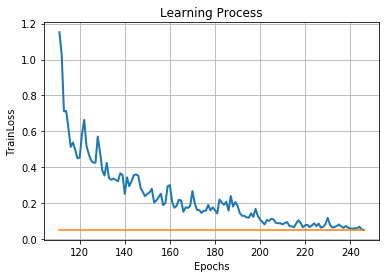

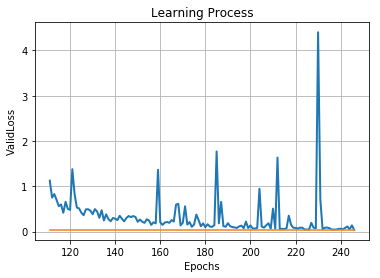

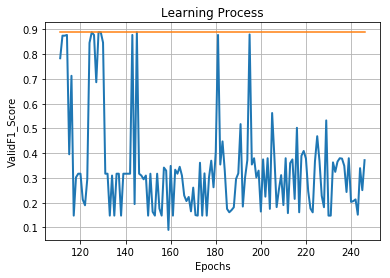

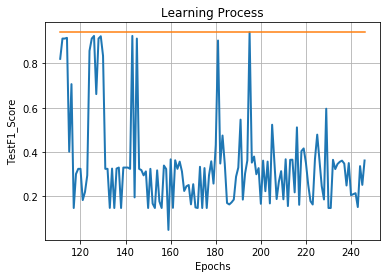

In [9]:
plt.plot(epochs[110:],plot1[110:,0],linewidth=2)
plt.plot(epochs[110:],minTLoss)
plt.title('Learning Process')
plt.xlabel('Epochs')
plt.ylabel('TrainLoss')
plt.grid()
plt.show()

plt.plot(epochs[110:],plot1[110:,1],linewidth=2)
plt.plot(epochs[110:],minVLoss)
plt.title('Learning Process')
plt.xlabel('Epochs')
plt.ylabel('ValidLoss')
plt.grid()
plt.show()

plt.plot(epochs[110:],plot1[110:,2],linewidth=2)
plt.plot(epochs[110:],maxF1V)
plt.title('Learning Process')
plt.xlabel('Epochs')
plt.ylabel('ValidF1_Score')
plt.grid()
plt.show()

plt.plot(epochs[110:],plot1[110:,3],linewidth=2)
plt.plot(epochs[110:],maxF1T)
plt.title('Learning Process')
plt.xlabel('Epochs')
plt.ylabel('TestF1_Score')
plt.grid()
plt.show()

#plt.plot(epochs[110:],plot1[110:,2],linewidth=2)
#plt.legend(['ValidLoss','ValidF1_Score','TestF1_Score'])

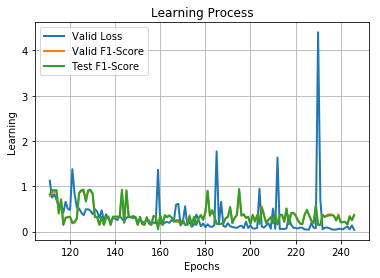

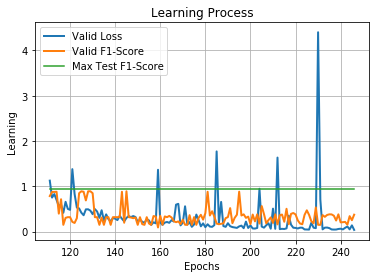

In [12]:
plt.plot(epochs[110:],plot1[110:,1],linewidth=2)
plt.plot(epochs[110:],plot1[110:,2],linewidth=2)
plt.plot(epochs[110:],plot1[110:,3],linewidth=2)
plt.title('Learning Process')
plt.xlabel('Epochs')
plt.ylabel('Learning')
plt.grid()
plt.legend(['Valid Loss','Valid F1-Score','Test F1-Score'])
plt.show()

plt.plot(epochs[110:],plot1[110:,1],linewidth=2)
plt.plot(epochs[110:],plot1[110:,2],linewidth=2)
plt.plot(epochs[110:],maxF1T)
plt.title('Learning Process')
plt.xlabel('Epochs')
plt.ylabel('Learning')
plt.grid()
plt.legend(['Valid Loss','Valid F1-Score','Max Test F1-Score'])
plt.show()

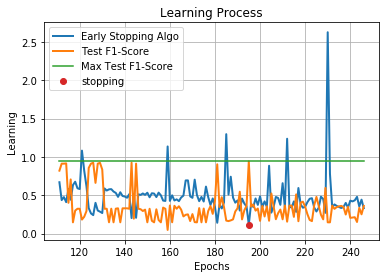

0.941176470588
0.941176470588


In [25]:
Early_Algo = 0.5*plot1[110:,1] + 0.5*(1-plot1[110:,2])
stop=epochs[110:]
finalF1=plot1[110:,3]

plt.plot(epochs[110:],Early_Algo,linewidth=2)
plt.plot(epochs[110:],plot1[110:,3],linewidth=2)
plt.plot(epochs[110:],maxF1T)
plt.plot(stop[np.argmin(Early_Algo)],Early_Algo[np.argmin(Early_Algo)],'o',linewidth=2)
plt.title('Learning Process')
plt.xlabel('Epochs')
plt.ylabel('Learning')
plt.grid()
plt.legend(['Early Stopping Algo', 'Test F1-Score', 'Max Test F1-Score','stopping'])
plt.show()

print(maxF1T[0])
print(finalF1[np.argmin(Early_Algo)])